In [1]:
import math
import numpy as np
#import cupy as np
import scipy
from matplotlib.pyplot import figure, show
import matplotlib as mpl
import matplotlib.pyplot as plt
import illustris_python as il

In [2]:
basePath = '/net/virgo01/data/users/mccarthy/Illustris-3/'

# 1: Selecting a Box and getting rid of particles

In [3]:
dm_pos = il.snapshot.loadSubset(basePath,135,'dm',['Coordinates'])

In [4]:
def boxshower(L,pqx,pqy,pqz,N):
    """Shows a box of the cosmic web and returns the positions of particles in that bos
    Inputs:
    L: N by 3 dataset of the x, y and z values
    pqx: upper and lower bounds for the x-dimension (a 2 by 1 array with values between 0 and 1)
    pqy: upper and lower bounds for the y-dimension (a 2 by 1 array with values between 0 and 1)
    pqz: upper and lower bounds for the z-dimension (a 2 by 1 array with values between 0 and 1)
    N: the length of the dataset in units of ckpc/h"""
    px = pqx[0]
    qx = pqx[1]
    py = pqy[0]
    qy = pqy[1]
    pz = pqz[0]
    qz = pqz[1]

    mskx1 = dm_pos_x<N*qx
    dm_pos_x1 = dm_pos_x[mskx1]
    dm_pos_y1 = dm_pos_y[mskx1]
    dm_pos_z1 = dm_pos_z[mskx1]
    mskx2 = dm_pos_x1>N*px
    dm_pos_x2 = dm_pos_x1[mskx2]
    dm_pos_y2 = dm_pos_y1[mskx2]
    dm_pos_z2 = dm_pos_z1[mskx2]

    msky1 = dm_pos_y2<N*qy
    dm_pos_x1 = dm_pos_x2[msky1]
    dm_pos_y1 = dm_pos_y2[msky1]
    dm_pos_z1 = dm_pos_z2[msky1]
    msky2 = dm_pos_y1>N*py
    dm_pos_x2 = dm_pos_x1[msky2]
    dm_pos_y2 = dm_pos_y1[msky2]
    dm_pos_z2 = dm_pos_z1[msky2]

    mskz1 = dm_pos_z2<N*qz
    dm_pos_x1 = dm_pos_x2[mskz1]
    dm_pos_y1 = dm_pos_y2[mskz1]
    dm_pos_z1 = dm_pos_z2[mskz1]
    mskz2 = dm_pos_z1>N*pz
    dm_pos_x2 = dm_pos_x1[mskz2]
    dm_pos_y2 = dm_pos_y1[mskz2]
    dm_pos_z2 = dm_pos_z1[mskz2]

    fig = figure()
    frame = fig.add_subplot(1,1,1)
    frame.hist2d(dm_pos_x2, dm_pos_y2, norm=mpl.colors.LogNorm(), bins=256, cmin=1);
    frame.set_xlim([N*px,N*qx])
    frame.set_ylim([N*py,N*qy])
    frame.set_aspect('equal')
    frame.set_xlabel('x [ckpc/h]')
    frame.set_ylabel('y [ckpc/h]')

    fig = figure()
    frame = fig.add_subplot(1,1,1)
    frame.hist2d(dm_pos_x2, dm_pos_z2, norm=mpl.colors.LogNorm(), bins=256, cmin=1);
    frame.set_xlim([N*px,N*qx])
    frame.set_ylim([N*pz,N*qz])
    frame.set_aspect('equal')
    frame.set_xlabel('x [ckpc/h]')
    frame.set_ylabel('z [ckpc/h]')

    fig = figure()
    frame = fig.add_subplot(1,1,1)
    frame.hist2d(dm_pos_y2, dm_pos_z2, norm=mpl.colors.LogNorm(), bins=256,cmin=1);
    frame.set_xlim([N*py,N*qy])
    frame.set_ylim([N*pz,N*qz])
    frame.set_aspect('equal')
    frame.set_xlabel('y [ckpc/h]')
    frame.set_ylabel('z [ckpc/h]')
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(dm_pos_x2,dm_pos_y2, dm_pos_z2,s=0.01)
    #ax.set_xlim([N*py,N*qy])
    #ax.set_ylim([N*pz,N*qz])
    #ax.set_zlim([N*pz,N*qz])
    ax.set_aspect('equal')
    ax.set_xlabel('x [ckpc/h]')
    ax.set_ylabel('y [ckpc/h]')
    ax.set_zlabel('z [ckpc/h]')
    
    return np.array([dm_pos_x2,dm_pos_y2,dm_pos_z2])

In [12]:
N_el = len(dm_pos)
print(N_el/(3*8))

3924848.9583333335


In [13]:
random = np.random.uniform(0,1,N_el)
print(random)

[0.69848663 0.16968368 0.70205579 ... 0.74276972 0.32354431 0.26869397]


In [14]:
mask = random < 1/128
print(mask)

dm_pos_small = dm_pos[mask]

[False False False ... False False False]


In [15]:
print(dm_pos)

[[  860.2786   26320.94     18281.758   ]
 [  862.8968   26320.16     18283.193   ]
 [  859.6459   26324.168    18280.25    ]
 ...
 [60536.855    49059.383    56893.633   ]
 [65776.43     61606.74     46854.918   ]
 [64010.445    61434.027       70.096725]]


In [16]:
print(dm_pos_small)

[[  865.1678 26317.355  18283.37  ]
 [  851.1459 26327.135  18286.719 ]
 [  867.3087 26316.096  18294.996 ]
 ...
 [62417.664  50800.133  55742.125 ]
 [62088.88   31091.068    765.962 ]
 [60006.617    906.3308 73712.22  ]]


In [17]:
print(len(dm_pos_small))
print(len(dm_pos_small[:,0]))

736273
736273


Text(0, 0.5, 'y [ckpc/h]')

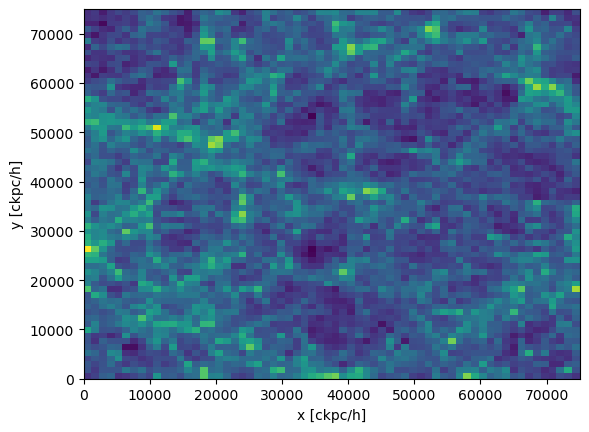

In [18]:
plt.hist2d(dm_pos_small[:,0], dm_pos_small[:,1], norm=mpl.colors.LogNorm(), bins=64);
plt.xlim([0,75000])
plt.ylim([0,75000])
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')

Text(0, 0.5, 'y [ckpc/h]')

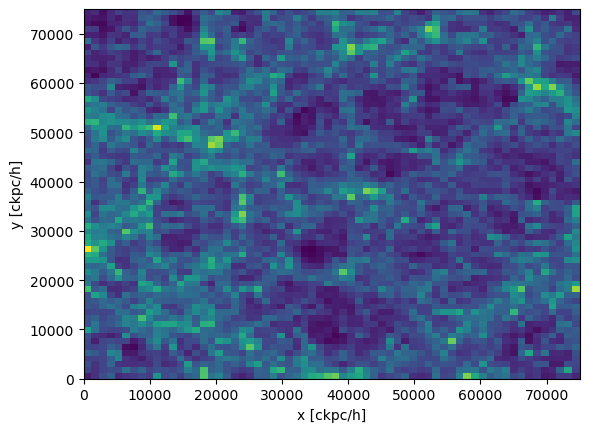

In [19]:
plt.hist2d(dm_pos[:,0], dm_pos[:,1], norm=mpl.colors.LogNorm(), bins=64);
plt.xlim([0,75000])
plt.ylim([0,75000])
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')

In [20]:
points = dm_pos_small

In [21]:
m = np.ones(len(points))

# 2: DTFE

In [22]:
#Load the numpy and scipy libraries
from scipy.spatial import Delaunay
import numba
from numba import float32, float64, int64
from typing import Union

@numba.jit(nopython=True, nogil=True)
def tetrahedron_volume(sim: int64[:], points: float64[:,:]):
    return abs(np.linalg.det(np.stack((points[sim[1]] - points[sim[0]], 
                                       points[sim[2]] - points[sim[0]],
                                       points[sim[3]] - points[sim[0]])))) / 6

@numba.jit(nopython=True, nogil=True)
def compute_densities(pts: float64[:,:], simps: float64[:,:],
                      m: Union[float64, float64[:]]) -> np.ndarray:
    M = len(pts)
    rho = np.zeros(M, dtype='float64')
    for sim in simps:
        vol = tetrahedron_volume(sim, pts)
        for index in sim:
            rho[index] += vol
    return (3 + 1) * m / rho

@numba.jit(nopython=True, nogil=True)
def compute_gradients(pts: float64[:,:], simps: float64[:,:], rho: float64[:],
                      v: float64[:,:]) -> tuple[np.ndarray, np.ndarray]:
    N = len(simps)
    Drho = np.zeros((N, 3), dtype='float64')
    Dv   = np.zeros((N, 3, 3), dtype='float64')

    for i, s in enumerate(simps):
        [p0, p1, p2, p3] = pts[s]
        [r0, r1, r2, r3] = rho[s]
        [v0, v1, v2, v3] = v[s]

        Ainv: float64[:,:] = np.linalg.inv(np.stack((p1 - p0, p2 - p0, p3 - p0)))
        Drho[i] = Ainv @ np.array([r1 - r0, r2 - r0, r3 - r0])
        Dv[i] = Ainv @ np.stack((v1 - v0, v2 - v0, v3 - v0))
    return (Drho, Dv)

@numba.jit(nopython=True, nogil=True)
def map_affine(a, b, c):
    assert(len(a) == len(b) == len(c))
    result = np.zeros_like(a)
    for i in range(len(a)):
        result[i] = a[i] + b[i] @ c[i]
    return result

#The Delaunay Tesselation Field Estimator 
class DTFE:
    def __init__(self, points, velocities, m):
        print("Delaunay Tesselation Field Estimator initialization:")
        self.velocities = velocities
        print("\t-Evaluate Delaunay tessellation")
        self.delaunay = Delaunay(points)
        
        #Area of a triangle
        
        #The density estimate
        print("\t-Evaluate density estimate")
        self.rho = compute_densities(self.delaunay.points, self.delaunay.simplices, m)
        #The gradients
        print("\t-Evaluate gradients")
        self.Drho, self.Dv = compute_gradients(self.delaunay.points, self.delaunay.simplices,
                                               self.rho, self.velocities)

    #The interpolations
    def density(self, x, y, z):
        simplexIndex = self.delaunay.find_simplex(np.c_[x, y, z])
        pointIndex   = self.delaunay.simplices[simplexIndex][...,0]
        return map_affine(self.rho[pointIndex], self.Drho[simplexIndex],
                          np.c_[x, y, z] - self.delaunay.points[pointIndex])

    def v(self, x, y, z):
        simplexIndex = self.delaunay.find_simplex(np.c_[x, y, z])
        pointIndex   = self.delaunay.simplices[simplexIndex][...,0]
        return map_affine(self.velocities[pointIndex], self.Dv[simplexIndex],
                          np.c_[x, y, z] - self.delaunay.points[pointIndex])
    
    def gradV(self, x, y, z):
        return self.Dv[self.delaunay.find_simplex(np.c_[x, y, z])]

    def theta(self, x, y, z):
        simplexIndex = self.delaunay.find_simplex(np.c_[x, y, z])
        return (self.Dv[simplexIndex][...,0,0] + 
                self.Dv[simplexIndex][...,1,1] + 
                self.Dv[simplexIndex][...,2,2])

    def sigma(self, x, y, z):
        simplexIndex = self.delaunay.find_simplex(np.c_[x, y, z])
        Dv = self.Dv[simplexIndex]
        theta = Dv[...,0,0] + Dv[...,1,1] + Dv[...,2,2]
        return np.array([[Dv[...,0,0] - theta / 3       , (Dv[...,0,1] + Dv[...,1,0]) / 2, (Dv[...,0,2] + Dv[...,2,0]) / 2],
                        [(Dv[...,1,0] + Dv[...,0,1]) / 2,  Dv[...,1,1] - theta / 3       , (Dv[...,1,2] + Dv[...,2,1]) / 2],
                        [(Dv[...,2,0] + Dv[...,0,2]) / 2, (Dv[...,2,1] + Dv[...,1,2]) / 2,  Dv[...,2,2] - theta / 3       ]]) 
    
    def omega(self, x, y, z):
        simplexIndex = self.delaunay.find_simplex(np.c_[x, y, z])
        Dv = self.Dv[simplexIndex]
        zeros = np.zeros(len(simplexIndex))
        return (np.array([[zeros, (Dv[...,0,1] - Dv[...,1,0]) / 2, (Dv[...,0,2] - Dv[...,2,0]) / 2],
                          [(Dv[...,1,0] - Dv[...,0,1]) / 2, zeros, (Dv[...,1,2] - Dv[...,2,1]) / 2],
                          [(Dv[...,2,0] - Dv[...,0,2]) / 2, (Dv[...,2,1] - Dv[...,1,2]) / 2, zeros]])) 

In [23]:
def power(k, gamma):
    return k**gamma

def GRF(L, gamma, sigma):
    kRange = 2 * np.pi * np.fft.fftfreq(L)
    kx, ky, kz = np.meshgrid(kRange, kRange, kRange)
    k2 = kx**2 + ky**2 + kz**2
    smooth_kernel = np.exp(- sigma ** 2 * k2 / 2)
    grf = np.fft.ifftn(
        np.sqrt(power(k2, gamma)) * 
                smooth_kernel * 
                np.fft.fftn(np.random.normal(0, 1, (L, L, L)))).real
    return grf / np.std(grf)

def gradient(data):
    kRange = 2 * np.pi * np.fft.fftfreq(L)
    kx, ky, kz = np.meshgrid(kRange, kRange, kRange)
    
    datax = -np.fft.ifftn(kx * np.fft.fftn(data)).imag
    datay = -np.fft.ifftn(ky * np.fft.fftn(data)).imag
    dataz = -np.fft.ifftn(kz * np.fft.fftn(data)).imag
    
    return np.transpose(np.array([datax, datay, dataz]),(1,2,3,0))

def Zeldovich(grf, D):
    velocities = gradient(grf)
    X, Y, Z = np.meshgrid(np.arange(L), np.arange(L), np.arange(L))
    points = np.transpose(np.array([X, Y, Z]), (1,2,3,0)) + D * velocities
    return (points.reshape(L**3, 3), velocities.reshape(L**3, 3))

In [24]:
L = 100
step = 100
sigma = 8
gamma = 1
n = int(L/step)

#print(step)

grf = GRF(100, gamma, sigma)
points_vel, velocities = Zeldovich(grf, 20)

In [25]:
normx = points[:,0] - np.min(points[:,0])
normy = points[:,1] - np.min(points[:,1])
normz = points[:,2] - np.min(points[:,2])

points_norm = np.transpose(np.array([normx,normy,normz]))

In [26]:
print(points_norm)

[[  864.9513  26316.701   18283.297  ]
 [  850.9294  26326.48    18286.646  ]
 [  867.0922  26315.441   18294.924  ]
 ...
 [62417.45    50799.477   55742.055  ]
 [62088.664   31090.414     765.8904 ]
 [60006.402     905.67645 73712.15   ]]


In [28]:
#%%time
dtfe = DTFE(points_norm, velocities, m)

Delaunay Tesselation Field Estimator initialization:
	-Evaluate Delaunay tessellation
	-Evaluate density estimate
	-Evaluate gradients


In [29]:
import matplotlib.pyplot as plt
def densPlot(data, imageSize):
    X = np.arange(0, data.shape[0])
    Y = np.arange(0, data.shape[1])
    X, Y = np.meshgrid(X, Y)

    plt.figure(figsize=(imageSize, imageSize))
    plt.pcolormesh(X, Y, data, shading='auto')
    plt.axis("equal")
    plt.show()

/var/lib/condor/execute/dir_50866/ipykernel_62682/124469020.py:15: RuntimeWarning: invalid value encountered in log
  densPlot(np.log(dens[-1]), 10)


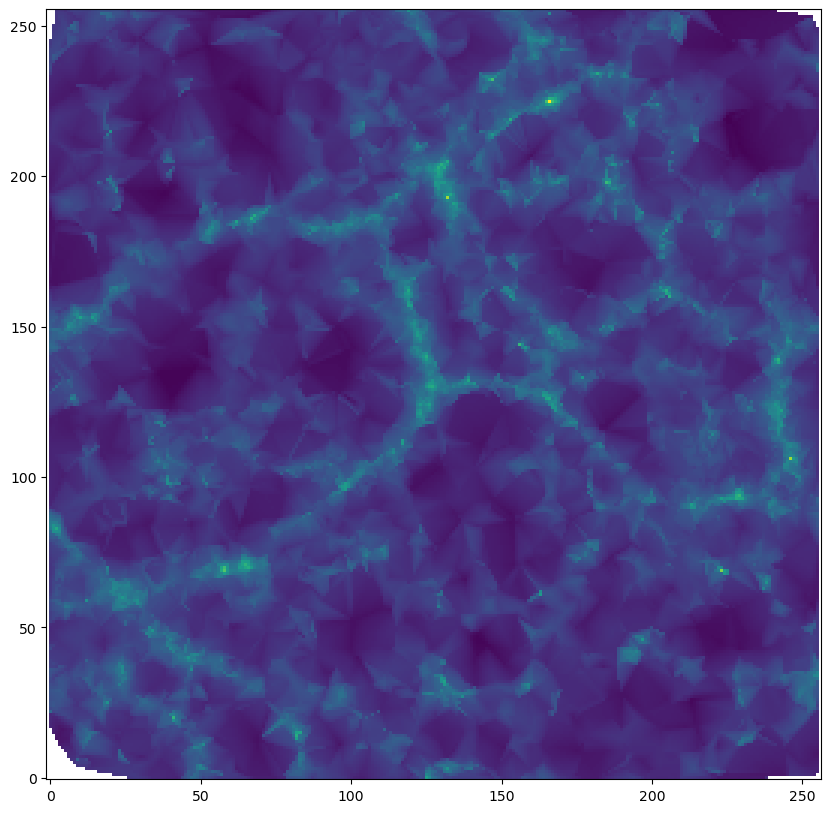

In [31]:
nx = 256
ny = 256
nz = 256

X, Y, Z = np.meshgrid(np.linspace(0.01*75000, 0.99*75000, nx),   
                   np.linspace(0.01*75000, 0.99*75000, ny),
                  np.linspace(0.01*75000, 0.99*75000, nz))

#print(dtfe.density(X.flat, Y.flat, Z.flat))
#print(len(X))


dens = dtfe.density(X.flat, Y.flat, Z.flat).reshape((nx,ny,nz))
#dens = np.transpose(dens)
densPlot(np.log(dens[-1]), 10)

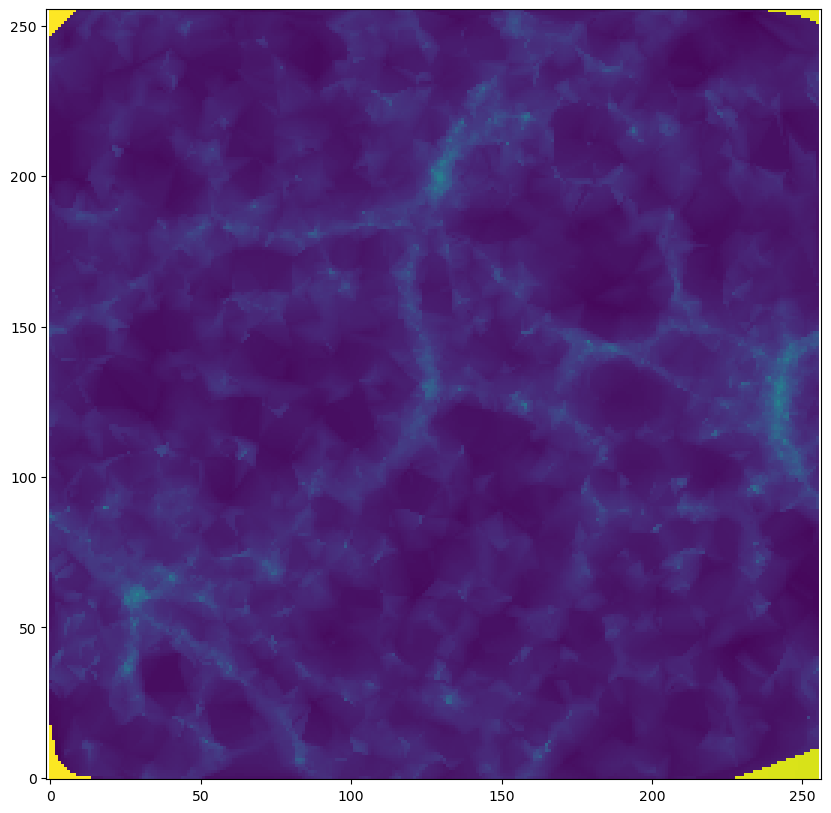

In [32]:
densPlot(np.log(dens[0]), 10)

In [33]:
np.save('density_wholelowparticles_256.npy',dens)